In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [2]:
df=pd.read_excel(r"D:\IDP\BPLDFinal.xlsx")
df.head(5)

,Unnamed: 0,contrast,dissimilarity,homogeneity,ASM,energy,hue,value,saturaton,label
0,0,32.728959,3.332089,0.322647,0.001247,0.035307,94.587029,45.134064,143.546947,0
1,1,40.785332,4.065412,0.258870,0.001221,0.034943,67.731644,36.498589,147.257851,0
2,2,68.404129,5.304493,0.214890,0.000660,0.025694,92.298634,47.442123,148.662052,0
3,3,66.539471,5.551389,0.203082,0.000486,0.022046,89.433384,43.799240,143.843159,0
4,4,78.397497,6.005634,0.180397,0.000499,0.022327,82.956219,46.800541,152.740974,0


In [3]:
df.columns

Index(['Unnamed: 0', 'contrast', 'dissimilarity', 'homogeneity', 'ASM',
       'energy', 'hue', 'value', 'saturaton', 'label'],
      dtype='object')

In [4]:
df.drop(columns=["Unnamed: 0","path"],inplace=True)

KeyError: "['path'] not found in axis"

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1:]

In [ ]:
y.value_counts(normalize=True)

label
0        0.2
1        0.2
2        0.2
3        0.2
4        0.2
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((525, 8), (225, 8), (525, 1), (225, 1))

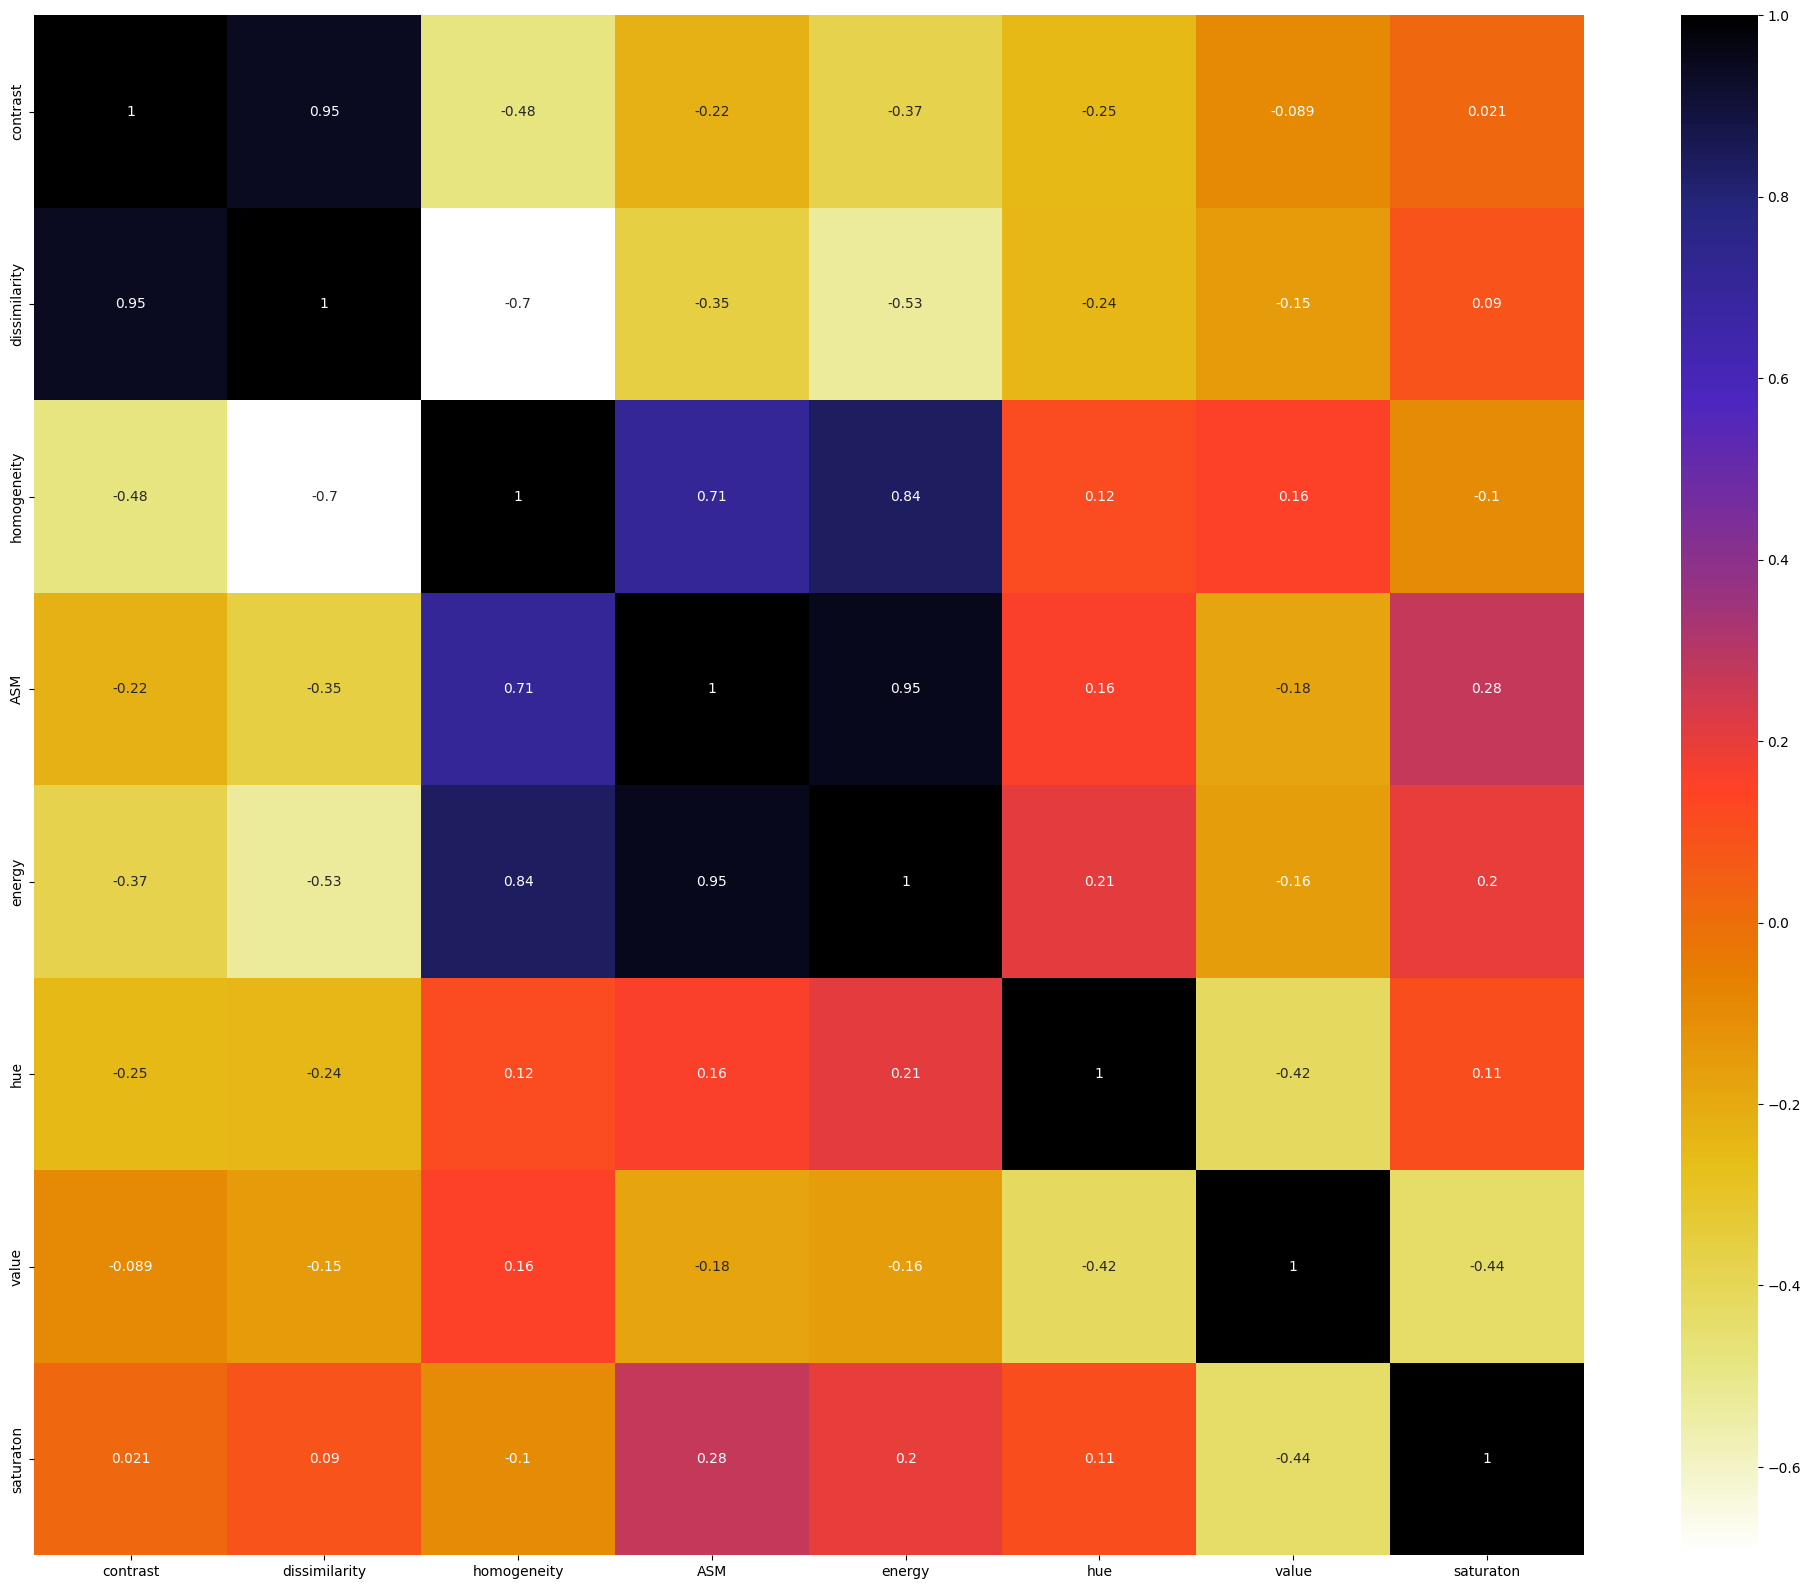

In [ ]:
plt.figure(figsize=(25,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
len(set(corr_features))


X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
# model = RandomForestClassifier(max_samples=0.75,random_state=42)
model.fit(X_train, y_train)

c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
preds = model.predict(X_test)
# preds = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(yt, yp):
    results = {}
    
    # Accuracy
    results['accuracy'] = accuracy_score(yt, yp)
    
    # Precision, recall, and F1-score
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='weighted')
    results['precision'] = precision
    results['recall'] = recall
    results['f1score'] = f_beta
    
    return results

# Call the function
# results = evaluate_metrics(y_train, preds)
results = evaluate_metrics(y_test, preds)
print(results)

{'accuracy': 0.68, 'precision': 0.6912147742406798, 'recall': 0.68, 'f1score': 0.678473500013773}
